In [1]:
pwd

'C:\\Users\\Prathmesh Mundhe'

In [31]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import cross_validation , metrics
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\Prathmesh Mundhe\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Cleaning Checklist
# Saving original data

In [4]:
df = pd.read_csv("IBM_HR_dataset.csv")

# Listing type of data present in data frame

In [5]:
df.get_dtype_counts()

int64     26
object     9
dtype: int64

In [32]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [7]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# This indicates that there is no missing data in the dataset
# Also there is no bad data present in data frame
# Identifying placeholder data
# Summary Statistics

In [8]:
df.describe()

Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  3031.000000  3031.000000       3031.000000  3031.00000         3031.0   
mean     36.965358   811.693500         10.958430     3.04355            1.0   
std       8.004565   391.226307          9.315709     0.98004            0.0   
min      18.000000   102.000000          1.000000     1.00000            1.0   
25%      31.000000   419.000000          2.000000     2.00000            1.0   
50%      36.000000   878.000000          8.000000     3.00000            1.0   
75%      41.000000  1167.000000         20.000000     4.00000            1.0   
max      60.000000  1499.000000         29.000000     5.00000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     3031.000000              3031.000000  3031.000000     3031.000000   
mean      1553.103926                 2.881227    65.029363        2.596503   
std        662.263874                 0.988922    21.495063        0.722007   
min          1.000000                 1.000000    30.000000        1.000000   
25%       1047.500000                 2.000000    46.000000        2.000000   
50%       2038.000000                 3.000000    62.000000        3.000000   
75%       2052.000000                 4.000000    81.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel          ...           RelationshipSatisfaction  \
count  3031.000000          ...                        3031.000000   
mean      1.969317          ...                           2.712966   
std       0.977325          ...                           1.099697   
min       1.000000          ...                           1.000000   
25%       1.000000          ...                           2.000000   
50%       2.000000          ...                           3.000000   
75%       2.000000          ...                           4.000000   
max       5.000000          ...                           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         3031.0       3031.000000        3031.000000   
mean            80.0          0.830749          11.166942   
std              0.0          0.852907           6.714585   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            3031.000000      3031.000000     3031.000000   
mean                2.713626         2.783900        6.742989   
std                 1.142262         0.672774        5.255793   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         3.000000        4.000000   
50%                 2.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         3031.000000              3031.000000           3031.000000  
mean             3.737710                 1.623557              3.481359  
std              2.927647                 2.814477              3.128634  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              1.000000  
50%              3.000000                 1.000000              2.000000  
75%              4.000000                 2.000000              6.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 26 columns]

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Distribution of every column accordingly

# This indicates people in age group between 30-40 are the highest

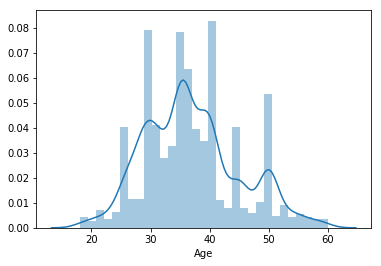

In [10]:
sns.distplot(df['Age'])
plt.show()

# Some of the plots are normally distributed only to a point and not entirely

# plot of each column indicates proper distribution on data set

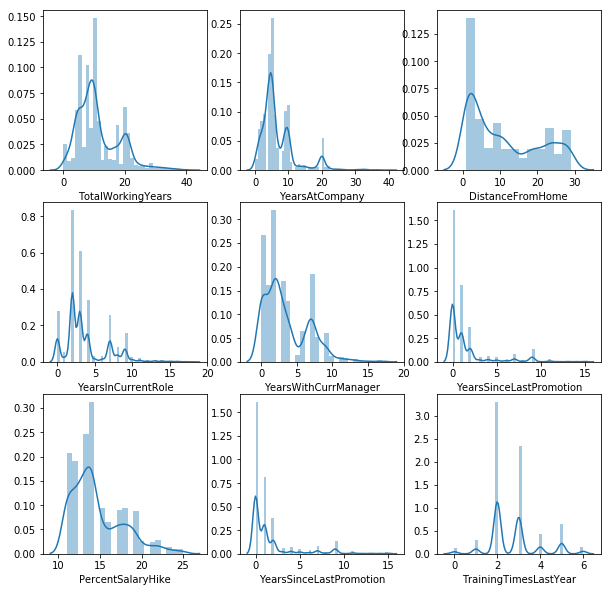

In [12]:
fig,ax = plt.subplots(3,3, figsize=(10,10))              
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[2,2]) 
plt.show()

# Box Plot

# This plot indicates that monthly income of sales is way to high than human resources

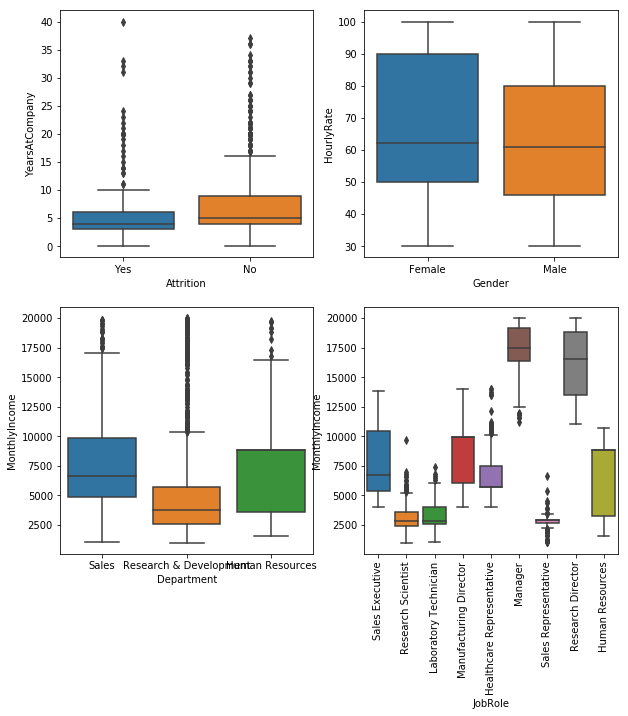

In [13]:
fig,ax = plt.subplots(2,2, figsize=(10,10))                       # 'ax' has references to all the four axes
sns.boxplot(df['Attrition'], df['YearsAtCompany'], ax = ax[0,0])  # Plot on 1st axes 
sns.boxplot(df['Gender'], df['HourlyRate'], ax = ax[0,1])  # Plot on IInd axes
plt.xticks( rotation=90)
sns.boxplot(df['Department'], df['MonthlyIncome'], ax = ax[1,0])       # Plot on IIIrd axes
plt.xticks( rotation=90)

sns.boxplot(df['JobRole'], df['MonthlyIncome'], ax = ax[1,1])     # Plot on IV the axes
plt.show() 

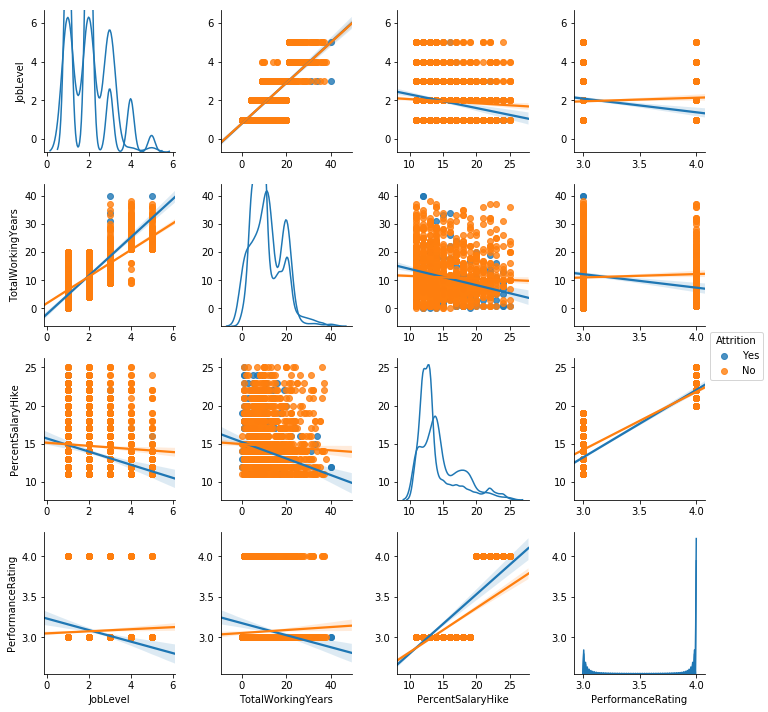

In [14]:
cont_col= ['Attrition','JobLevel','TotalWorkingYears', 'PercentSalaryHike','PerformanceRating']
sns.pairplot(df[cont_col], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

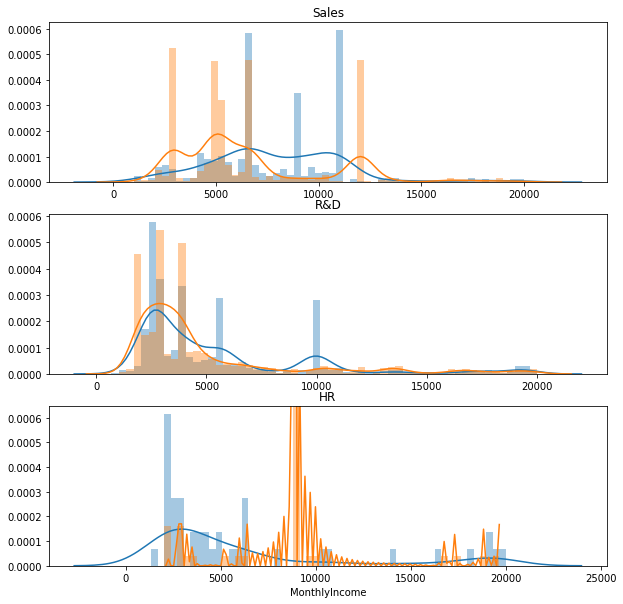

In [16]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1) #is used so that all 3 gaphs are not plottedd in same graph it differentiates 
plt.title('Sales')
sns.distplot(df.MonthlyIncome[(df.Department == 'Sales') & (df.Gender == 'Male')], bins = np.linspace(0,20000,60))
sns.distplot(df.MonthlyIncome[(df.Department == 'Sales') & (df.Gender == 'Female')], bins = np.linspace(0,20000,60))
plt.xlabel('')

plt.subplot(3,1,2)
plt.title('R&D')
sns.distplot(df.MonthlyIncome[(df.Department == 'Research & Development') & (df.Gender == 'Male')], bins = np.linspace(0,20000,60))
sns.distplot(df.MonthlyIncome[(df.Department == 'Research & Development') & (df.Gender == 'Female')], bins = np.linspace(0,20000,60))
plt.xlabel('')

plt.subplot(3,1,3)
plt.title('HR')
sns.distplot(df.MonthlyIncome[(df.Department == 'Human Resources') & (df.Gender == 'Male')], bins = np.linspace(0,20000,60))
sns.distplot(df.MonthlyIncome[(df.Department == 'Human Resources') & (df.Gender == 'Female')], bins = np.linspace(0,20000,60))
#plt.xlabel('')
plt.show()

# Identifying highly correlated variables

In [17]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000  -0.073259          0.034122   0.155348   
DailyRate                -0.073259   1.000000         -0.100704   0.049560   
DistanceFromHome          0.034122  -0.100704          1.000000  -0.141940   
Education                 0.155348   0.049560         -0.141940   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.002648  -0.005744          0.156618   0.117805   
EnvironmentSatisfaction  -0.065393   0.044781          0.146666   0.045180   
HourlyRate                0.078771  -0.020266         -0.206302   0.182690   
JobInvolvement            0.077700   0.050581          0.045347  -0.067508   
JobLevel                  0.460211  -0.049406          0.256398  -0.195008   
JobSatisfaction           0.037729   0.154169         -0.042584  -0.048441   
MonthlyIncome             0.445058  -0.112455          0.132801  -0.082603   
MonthlyRate               0.012384   0.153365          0.132596  -0.032418   
NumCompaniesWorked        0.434232   0.020161          0.030202   0.092736   
PercentSalaryHike        -0.145085   0.021741         -0.014535  -0.010824   
PerformanceRating        -0.000027  -0.006357         -0.038108  -0.054914   
RelationshipSatisfaction  0.061970   0.000435         -0.231540   0.198706   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.187769   0.175770         -0.076650   0.081865   
TotalWorkingYears         0.625937   0.040666          0.141529  -0.091079   
TrainingTimesLastYear     0.051001  -0.183879         -0.102787   0.056546   
WorkLifeBalance           0.029007   0.033091         -0.094008   0.028794   
YearsAtCompany            0.199736  -0.039820          0.065557  -0.067986   
YearsInCurrentRole        0.150302  -0.050190          0.003242  -0.082977   
YearsSinceLastPromotion   0.163187  -0.050587          0.031514  -0.101621   
YearsWithCurrManager      0.085918  -0.066405          0.008387  -0.072605   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.002648   
DailyRate                           NaN       -0.005744   
DistanceFromHome                    NaN        0.156618   
Education                           NaN        0.117805   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.130651   
HourlyRate                          NaN       -0.017704   
JobInvolvement                      NaN       -0.142039   
JobLevel                            NaN       -0.081793   
JobSatisfaction                     NaN       -0.005273   
MonthlyIncome                       NaN       -0.086505   
MonthlyRate                         NaN       -0.034824   
NumCompaniesWorked                  NaN       -0.038394   
PercentSalaryHike                   NaN       -0.147705   
PerformanceRating                   NaN       -0.238765   
RelationshipSatisfaction            NaN       -0.030950   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.059480   
TotalWorkingYears                   NaN       -0.018928   
TrainingTimesLastYear               NaN       -0.045412   
WorkLifeBalance                     NaN        0.029710   
YearsAtCompany                      NaN       -0.043488   
YearsInCurrentRole                  NaN       -0.130540   
YearsSinceLastPromotion             NaN       -0.154709   
YearsWithCurrManager                NaN       -0.158906   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                     -0.065393    0.078771        0.077700   
DailyRate                                0.044781   -0.020266        0.050581   
DistanceFromHome                         0.146666   -0.206302        0.045347   
Educat

# Correlation between two columns

In [18]:
correlations = [[(index1, index2) for index2, column in row.iteritems() if column>0.6 and index1 != index2] 
 for index1, row in df.corr().iterrows()]
print("List of highly correlated variables:")
print()
for correlation in correlations:
    for item in correlation:
        print(item[0]," and ",item[1])

List of highly correlated variables:

Age  and  TotalWorkingYears
JobLevel  and  MonthlyIncome
JobLevel  and  TotalWorkingYears
MonthlyIncome  and  JobLevel
MonthlyIncome  and  TotalWorkingYears
PercentSalaryHike  and  PerformanceRating
PerformanceRating  and  PercentSalaryHike
TotalWorkingYears  and  Age
TotalWorkingYears  and  JobLevel
TotalWorkingYears  and  MonthlyIncome
YearsAtCompany  and  YearsInCurrentRole
YearsAtCompany  and  YearsSinceLastPromotion
YearsAtCompany  and  YearsWithCurrManager
YearsInCurrentRole  and  YearsAtCompany
YearsInCurrentRole  and  YearsSinceLastPromotion
YearsInCurrentRole  and  YearsWithCurrManager
YearsSinceLastPromotion  and  YearsAtCompany
YearsSinceLastPromotion  and  YearsInCurrentRole
YearsWithCurrManager  and  YearsAtCompany
YearsWithCurrManager  and  YearsInCurrentRole


# Exploratory Data Analysis

In [19]:
# Make plots larger
plt.rcParams['figure.figsize'] = (18, 9)

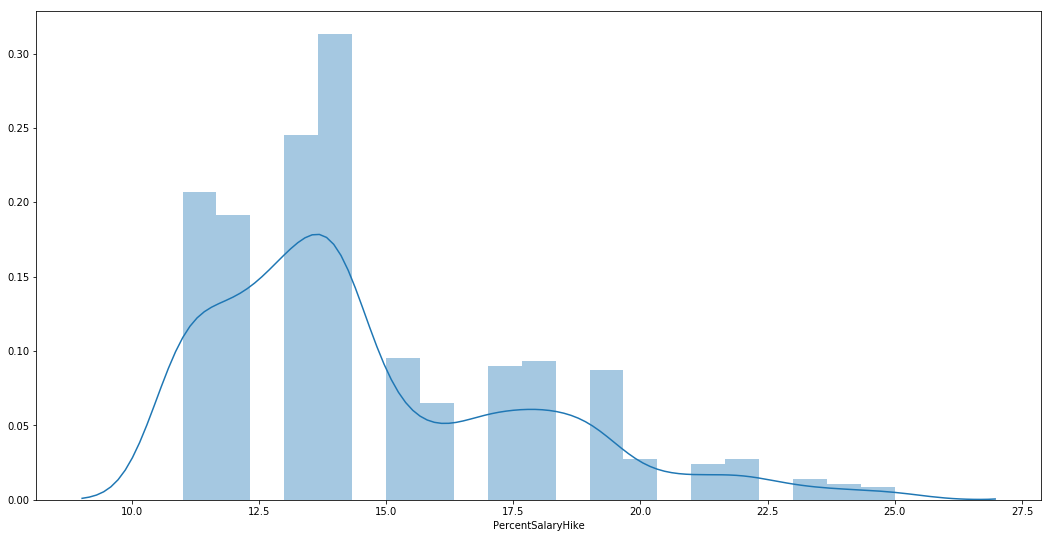

In [20]:
sns.distplot(df['PercentSalaryHike'],kde= True)
plt.show()

# Scatter plot of data on the basis of property built in a year and its price

# The line plot displays that joblevel of any employee depends on years they've worked and with proper experience

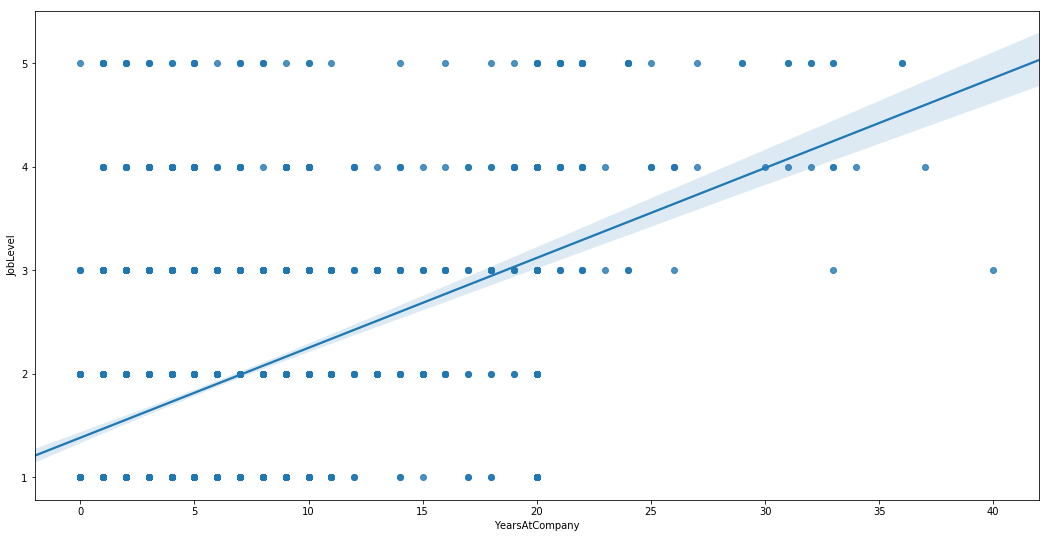

In [21]:
sns.regplot(x = 'YearsAtCompany',y='JobLevel',data = df,scatter = True)
plt.show()

# According to the job level there is a certain increase in salary hike

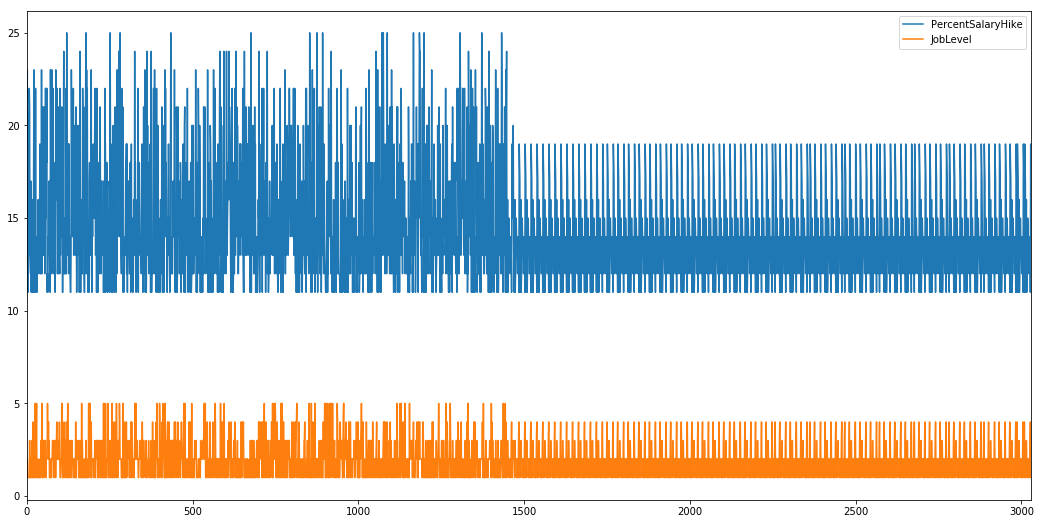

In [22]:
df_plot1 = df[['PercentSalaryHike','JobLevel']]
df_plot1.plot()
plt.show()

# Correlation between columns in certain criteria

                          JobLevel  TotalWorkingYears  MonthlyIncome  \
JobLevel                  1.000000           0.721969       0.915591   
TotalWorkingYears         0.721969           1.000000       0.664487   
MonthlyIncome             0.915591           0.664487       1.000000   
PercentSalaryHike        -0.090694          -0.078245      -0.055708   
Age                       0.460211           0.625937       0.445058   
RelationshipSatisfaction -0.202883          -0.176403      -0.164077   

                          PercentSalaryHike       Age  \
JobLevel                          -0.090694  0.460211   
TotalWorkingYears                 -0.078245  0.625937   
MonthlyIncome                     -0.055708  0.445058   
PercentSalaryHike                  1.000000 -0.145085   
Age                               -0.145085  1.000000   
RelationshipSatisfaction           0.038199  0.061970   

                          RelationshipSatisfaction  
JobLevel                                 -

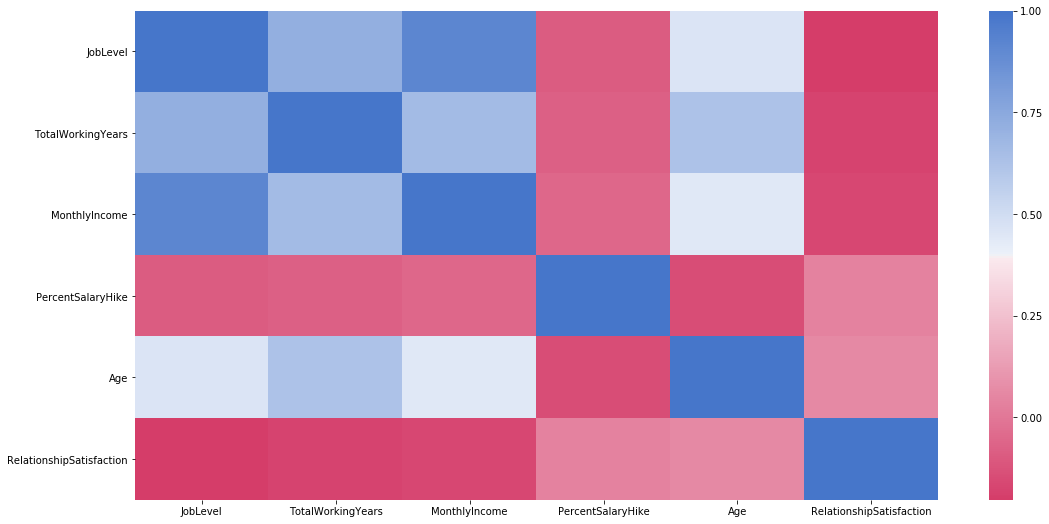

In [23]:
 cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[['JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 'PercentSalaryHike','Age','RelationshipSatisfaction']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

# Histogram of every column indicates a different plot of individual column depending o the type of data present

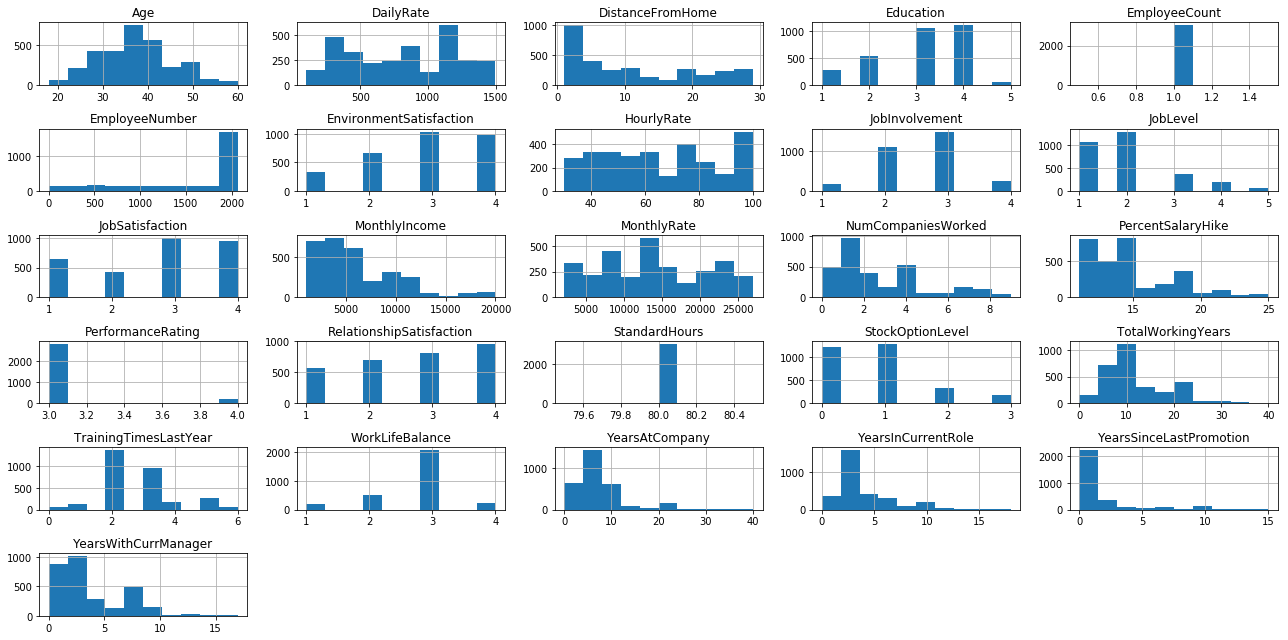

In [24]:
df.hist()
plt.tight_layout()
plt.show()

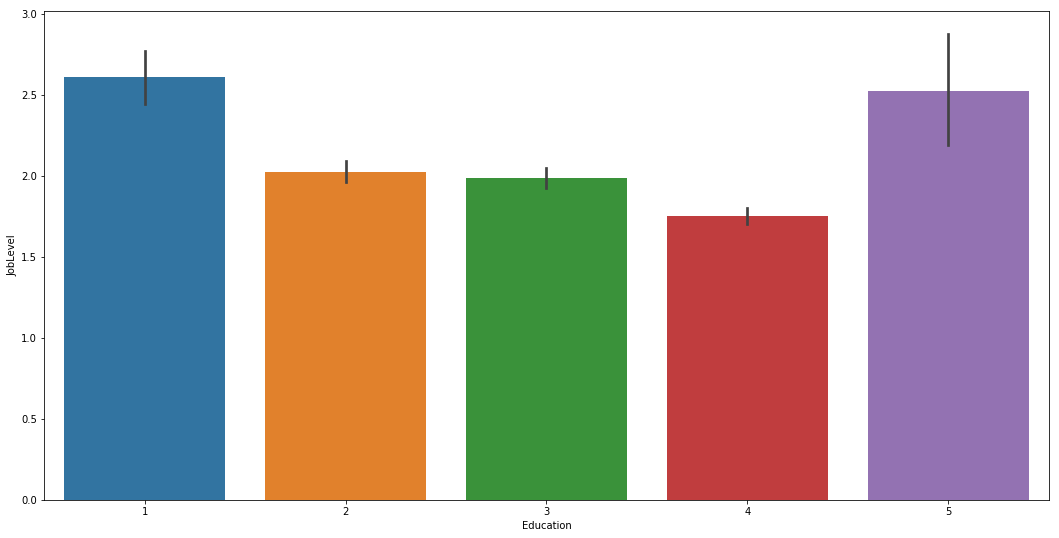

In [25]:
sns.barplot(x="Education",y="JobLevel",data=df)
plt.show()

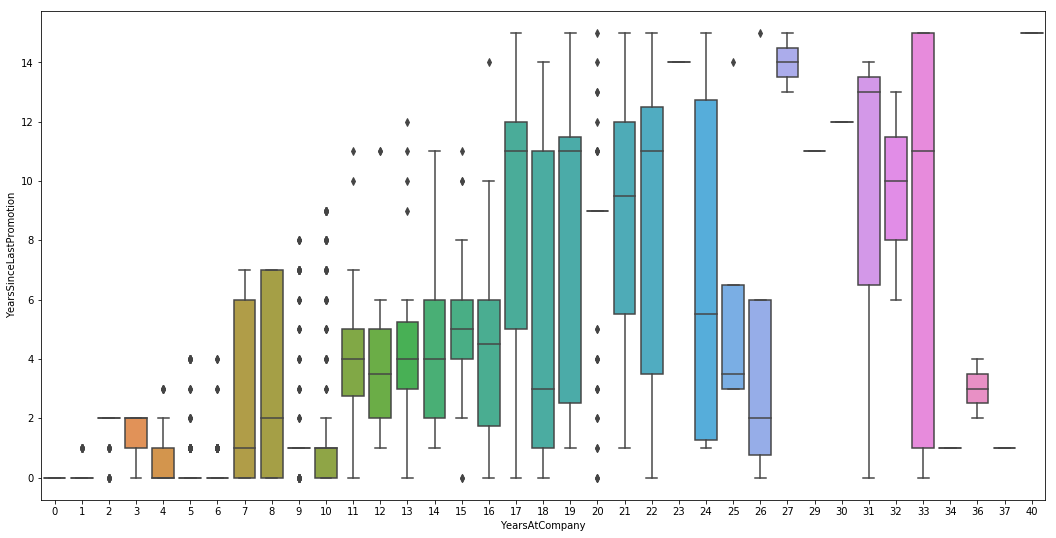

In [26]:
sns.boxplot(y="YearsSinceLastPromotion",x="YearsAtCompany",data=df)
plt.show()
plt.figure(figsize=(35,10))

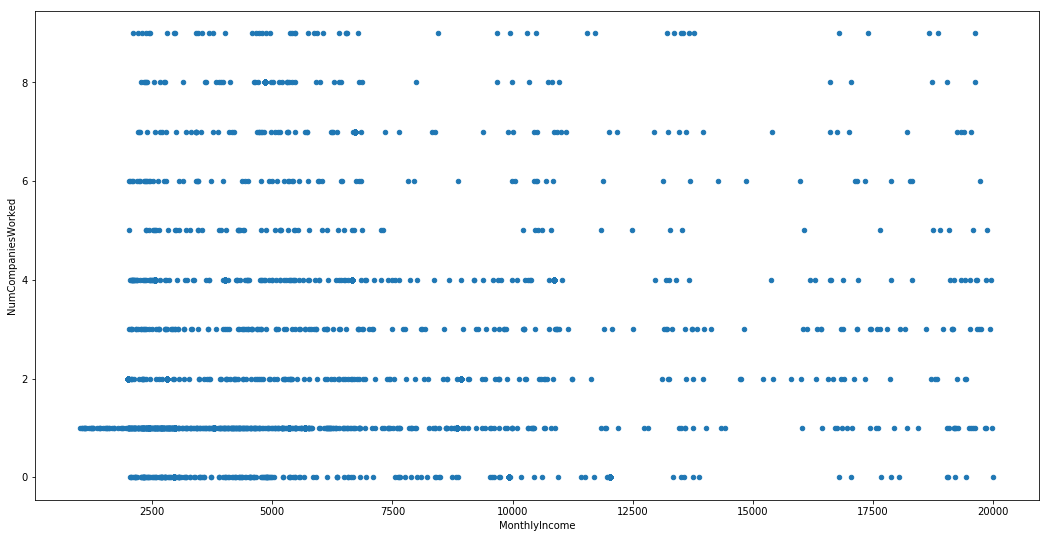

In [27]:
df.plot.scatter(x= 'MonthlyIncome',y = 'NumCompaniesWorked')
plt.show()

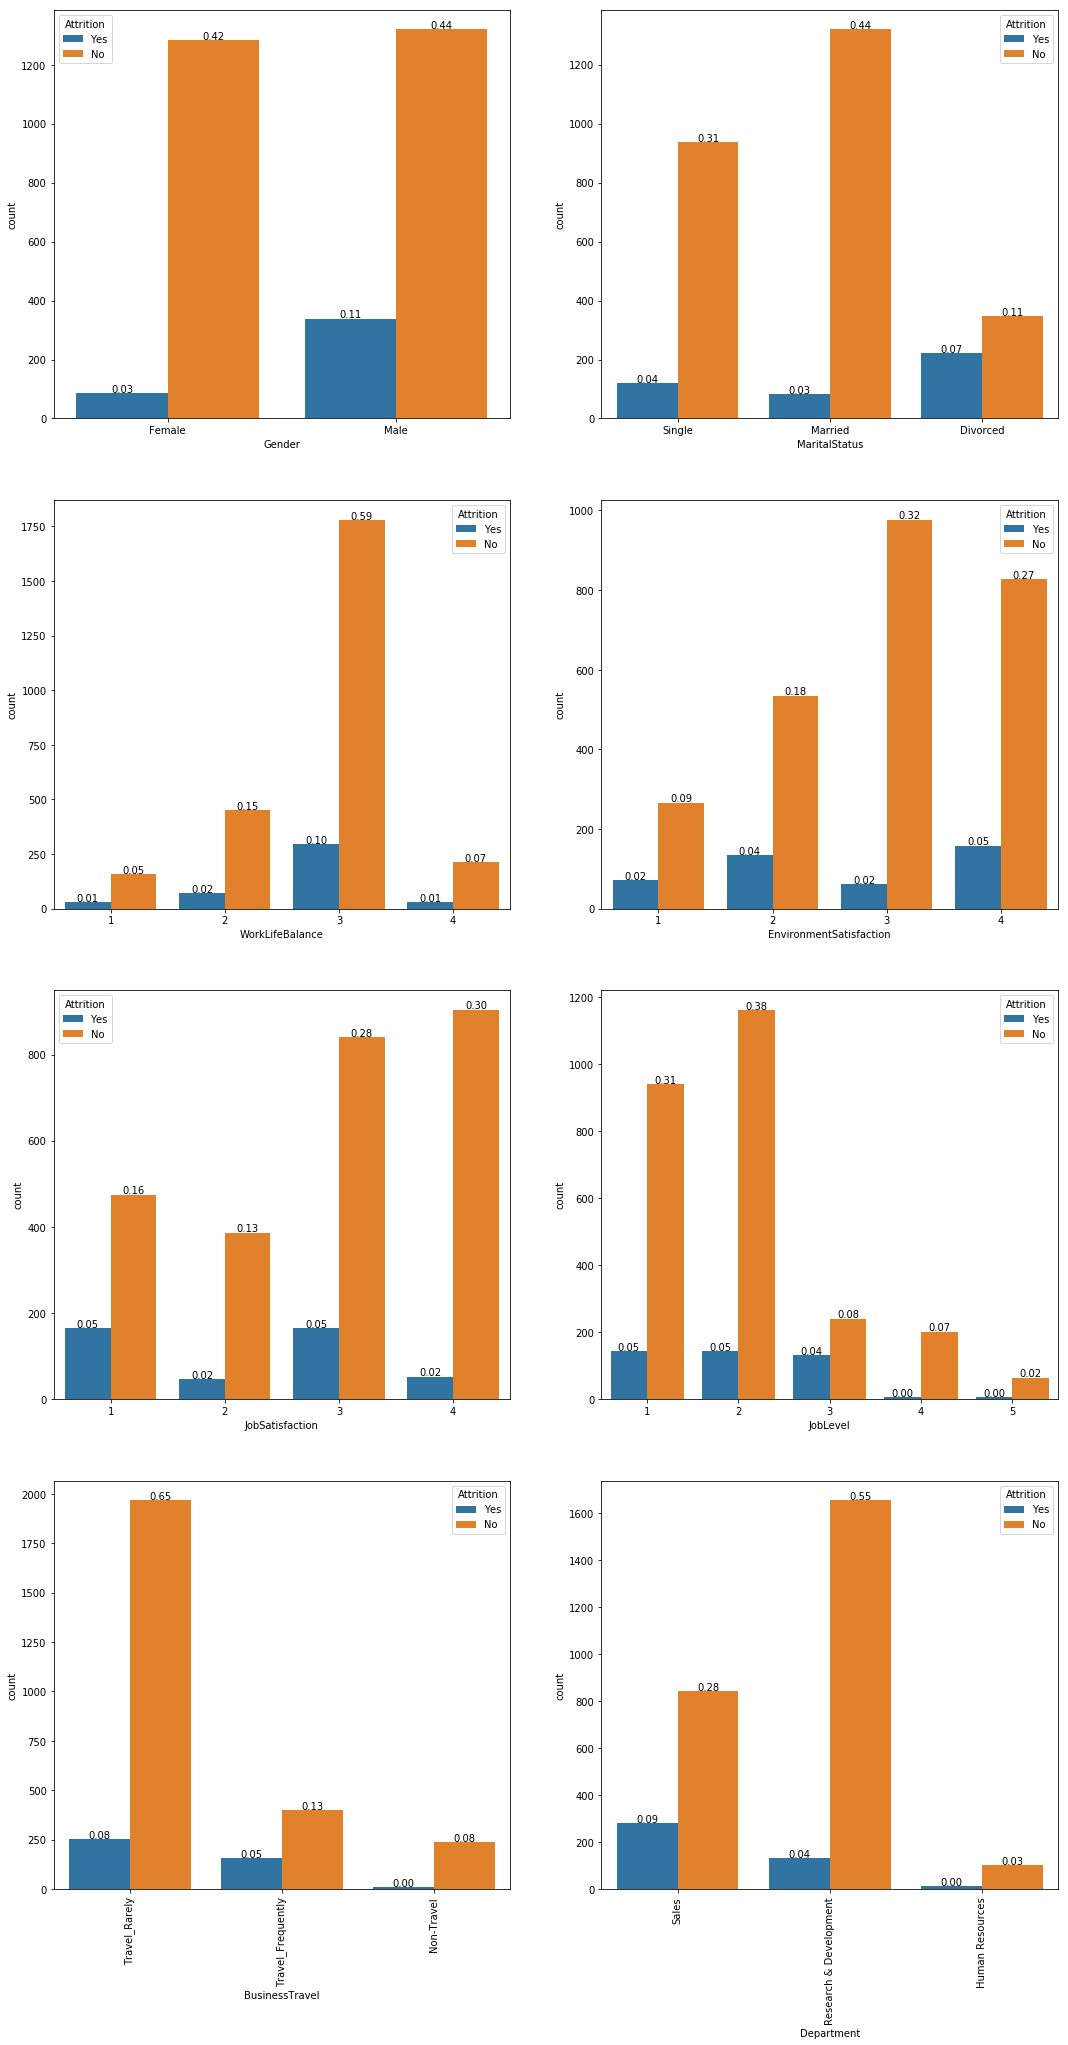

In [28]:
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]

j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

# Swarm plot indicates that depending on the department  monthly income tends to change Also research department has an income appropriate to the employees they dont change or is there any outlier of some employee only getting high wages

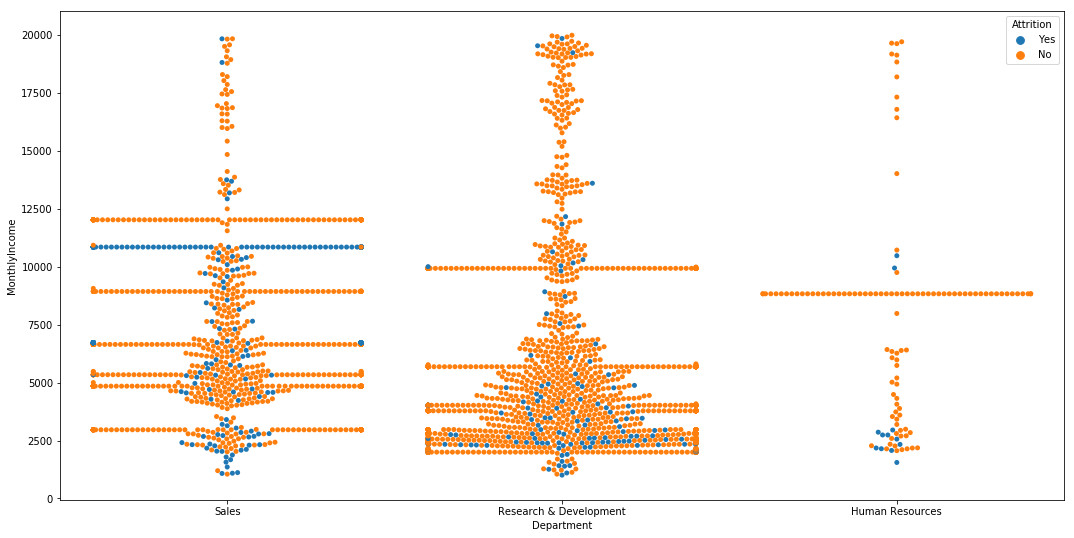

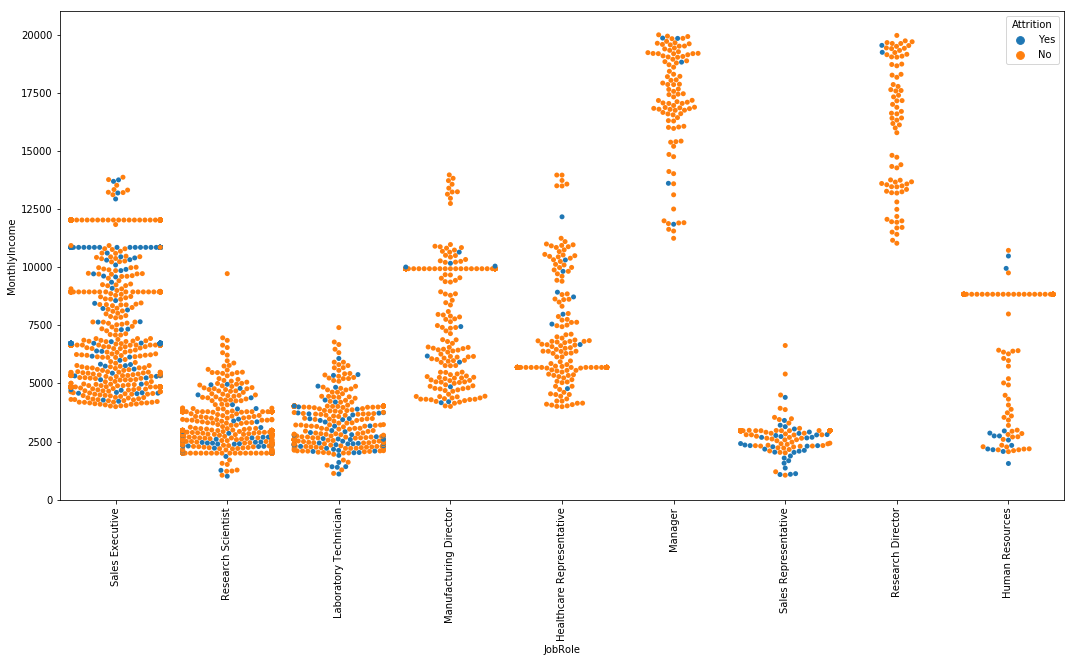

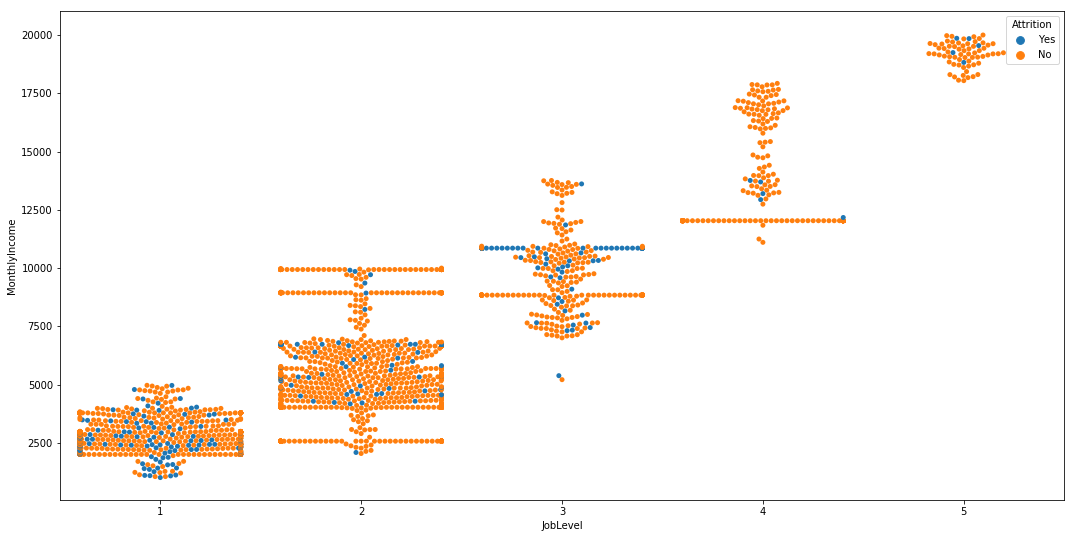

In [29]:
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df);
plt.xticks( rotation=90 )
plt.show()


sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=df);
plt.show()

# This indicates that attrition of females are low compared to male employees

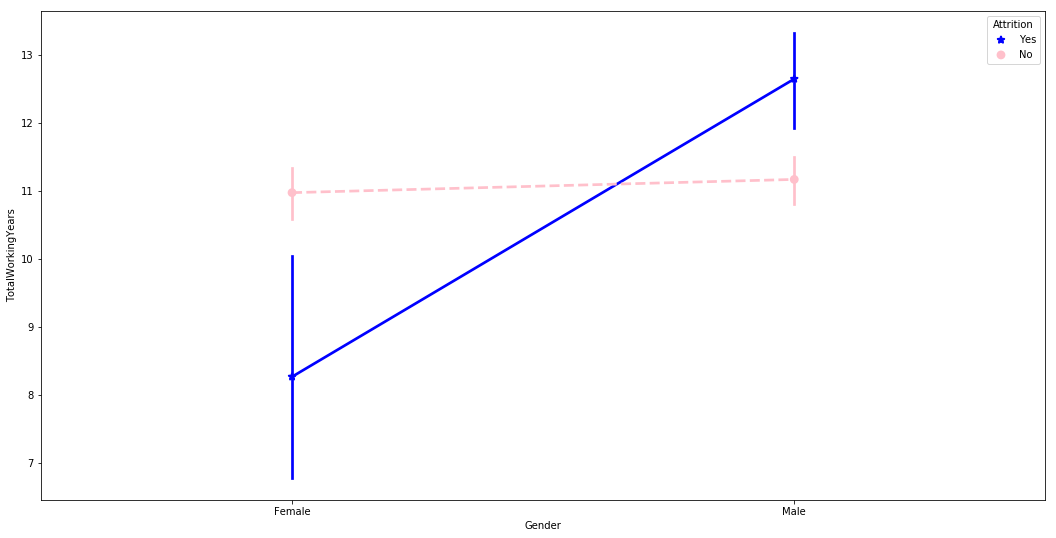

In [30]:
sns.pointplot(x="Gender", y="TotalWorkingYears", hue="Attrition", data=df,
              palette={"Yes": "blue", "No": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);
plt.show()

In [33]:
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  #Attrition contains only object values.

In [34]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [41]:
df = df.select_dtypes(exclude=['object'])

In [42]:
# Dividing the data into quantiles and doing the outlier analysis.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                          33
Attrition                   426
DailyRate                     0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                    275
JobSatisfaction               0
MonthlyIncome                91
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike            18
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            183
TotalWorkingYears            63
TrainingTimesLastYear       390
WorkLifeBalance             955
YearsAtCompany              232
YearsInCurrentRole          369
YearsSinceLastPromotion     321
YearsWithCurrManager         19
dtype: int64

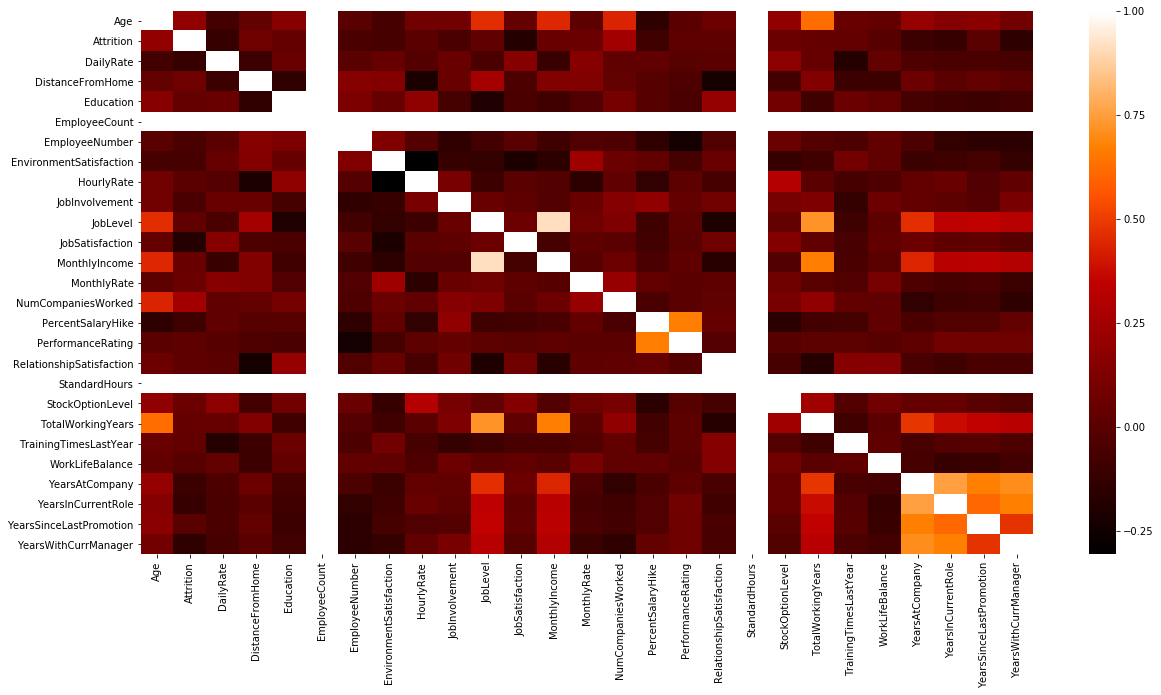

In [43]:
# Heatmap showing the correlation of various columns with each other.

ax = plt.figure(figsize = (20,10))
ax = sns.heatmap(df.corr(),cmap = 'gist_heat')

In [44]:
target = df['Attrition']
train = df.drop('Attrition',axis = 1)
train.shape

(3031, 26)

Text(0.5,1,'Count of classes')

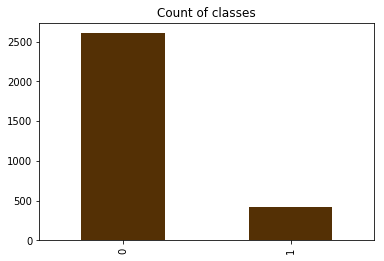

In [45]:
pd.value_counts(target).plot(kind = 'bar',cmap = 'BrBG')
plt.rcParams['axes.facecolor'] = 'blue'
plt.title("Count of classes")

In [46]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression' , 'GaussianNB' , 
          'Decision Tree' , 'K Means Clustering']

In [47]:
#Defining a function which will give us train and test accuracy for each classifier.
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(
    train, target, test_size=0.33, random_state=42)

#    ALGORITHMS

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

87.38916256157636 is the train accuracy
88.41158841158841 is the test accuracy


# Gaussian NB

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
train_predict = gnb.predict(X_train)
test_predict = gnb.predict(X_test)
train_test_error(train_predict , test_predict)

85.86206896551725 is the train accuracy
87.41258741258741 is the test accuracy


# Decision Tree

In [53]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
88.21178821178822 is the test accuracy


# KMeans

In [54]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2, random_state=1)
kms.fit(X_train,Y_train)
train_predict = kms.predict(X_train)
test_predict = kms.predict(X_test)
train_test_error(train_predict,test_predict)

58.423645320197046 is the train accuracy
61.33866133866134 is the test accuracy


# Result

# Hence Decision Tree has the highest Test accuracy